<a href="https://colab.research.google.com/github/vaammpyy/Physics_with_python/blob/main/Projectile_motion_trajectory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive
import sympy as sp

In [10]:
def plotter(x,f,xlim):
  plt.plot(x,f,'r')
  plt.grid()
  plt.legend(["Trajectory"])
  plt.ylabel("Height in m")
  plt.xlabel("Range in m")
  plt.ylim(bottom=0)
  plt.xlim(0,xlim)
  plt.show()

In [11]:
def trajectory(theta,velo,height,acceleration):
  theta=theta*np.pi/180
  u=velo
  h=height
  accel=acceleration
  xlim=0
  d= sp.Symbol('d')
  k=d*np.tan(theta)-accel*d**2/(u**2*(np.cos(theta))**2)+h
  m=sp.solve(k)
  if len(m)==2:
    xlim=np.ceil(m[1])
  else:
    xlim=np.ceil(m[0])
  x=np.linspace(0,10+xlim,50)
  f=lambda theta,u,h,accel:x*np.tan(theta)-accel*x**2/(u**2*(np.cos(theta))**2)+h
  t=(u*np.sin(theta)+np.sqrt((u*np.sin(theta))**2+2*accel*h))/accel
  h_max=(u*np.sin(theta))**2/(2*accel)+h
  print("Time of flight =",t,'s')
  if len(m)==2:
     print("Range =",m[1],'m')
  else:
     print("Range =",m[0],'m')
  print("Max height =",h_max,'m')
  plotter(x,f(theta,u,h,accel),xlim)



interactive(children=(IntSlider(value=0, description='theta', max=90, min=-90), IntSlider(value=13, descriptio…

Time of flight = 2.2870874995874626 s
Range = 21.0237960416286 m
Max height = 34.0 m


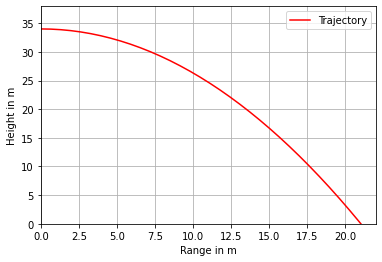

In [12]:
iplot=interactive(trajectory,
                  theta=(-90,90,1),
                  velo=(1,25,1),
                  height=(0,50,1),
                  acceleration=(1,25,1)
                  )
iplot